## Instructions

1. **Labeling & Peer Grading:** Your homework will be peer graded. To stay anonymous, avoid using your name and label your file with the last four digits of your student ID (e.g., HW#_Solutions_3938).

2. **Submission:** Submit both your IPython notebook (.ipynb) and an HTML file of the notebook to Canvas under Assignments → HW # → Submit Assignment. After submitting, download and check the files to make sure that you've uploaded the correct versions. Both files are required for your HW to be graded.
3. 
 <font color='red'> No pdf file required so write all the details in your ipynb file.</font>
2. **AI Use Policy:** Solve each problem independently by yourself. Use AI tools like ChatGPT or Google Gemini for brainstorming and learning only—copying AI-generated content is prohibited. You do not neeViolations will lead to penalties, up to failing the course.

3. **Problem Structure:** <font color='red'>Break down each problem ( already done in most problems) into three interconnected parts and implement each in separate code cells. Ensure that each part logically builds on the previous one. Include comments in your code to explain its purpose, followed by a Markdown cell analyzing what was achieved. After completing all parts, add a final Markdown cell reflecting on your overall approach, discussing any challenges faced, and explaining how you utilized AI tools in your process.
</font>
4. **Deadlines & Academic Integrity:** This homework is due on 10/01/2024 at midnight. <font color='red'>Disclosure of this assignment and assignment answers to anyone or any website is a contributory infringement of academic dishonesty at ISU. Do not share or post course materials without the express written consent of the copyright holder and instructor. The class will follow Iowa State University’s policy on academic dishonesty. Anyone suspected of academic dishonesty will be reported to the Dean of Students Office.</font>

#### Each problem is worth 25 points. Total $\bf 25\times 4 = 100$.

### Problem 1. 
Upload the textdata.csv and preprocess the text excerpts in the text column. 
* Find the various numerical information related to these text excerpts and add them to the textdata.csv as new columns with appropriate labels. The target variable "Bradley-Terry_Score"(https://en.wikipedia.org/wiki/Bradley%E2%80%93Terry_model) is related to the readability of the text excerpt; use the following links to learn more about various other scores and create new columns ( at least 10) with each text excerpts respective score and add the columns in the data. More information on text statistics are in https://pypi.org/project/textatistic and  https://pypi.org/project/textstat/
* Perform feature selection using methods such as correlation analysis, Recursive Feature Elimination (RFE), SelectKBest, or other relevant techniques, considering Bradley_Terry_Score as the target. Display a correlation heat map of the selected features and the target variable. 
* Create multiple linear regression models using Bradley_Terry_Score as the target variable, testing with three different test set sizes: 20%, 25%, and 30%. Cross-validate all models and summarize the test set metrics, including Mean Absolute Deviation (MAD), and R-squared (R²) in a table to identify the best model. Assess the suitability of developing a regression model for this problem, and provide your rationale based on the data and analysis results.


## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 20)

from textblob import TextBlob
from wordcloud import STOPWORDS
import textstat
from textatistic import Textatistic
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('punkt_tab', 'vader_lexicon')

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, make_scorer

[nltk_data] Downloading package punkt_tab to vader_lexicon...
[nltk_data]   Package punkt_tab is already up-to-date!


## Config

In [2]:
data_loc = "/Users/gabrielvictorgomesferreira/Library/Mobile Documents/com~apple~CloudDocs/Work/ISU Classes/Data/"
file_name = "textdata.csv"

## Import dataset

In [3]:
text_df = pd.read_csv(data_loc + file_name)
rows, columns = text_df.shape
print(f"The dataset contains {rows:,} rows and {columns} columns")
text_df.head(5)

The dataset contains 2,834 rows and 3 columns


,textid,text,Bradly_Terry_Score
0,c12129c31,When the young people returned to the ballroom...,-0.340259
1,85aa80a4c,"All through dinner time, Mrs. Fayre was somewh...",-0.315372
2,b69ac6792,"As Roger had predicted, the snow departed as q...",-0.580118
3,dd1000b26,And outside before the palace a great garden w...,-1.054013
4,37c1b32fb,Once upon a time there were Three Bears who li...,0.247197


* Find the various numerical information related to these text excerpts and add them to the textdata.csv as new columns with appropriate labels. The target variable "Bradley-Terry_Score"(https://en.wikipedia.org/wiki/Bradley%E2%80%93Terry_model) is related to the readability of the text excerpt; use the following links to learn more about various other scores and create new columns ( at least 10) with each text excerpts respective score and add the columns in the data. More information on text statistics are in https://pypi.org/project/textatistic and  https://pypi.org/project/textstat/

#### Subjectivity & Polarity

In [4]:
stops = list(STOPWORDS)
print(stops)

# Compute text analysis scores
sia = SentimentIntensityAnalyzer()
text_df['tokens'] = text_df['text'].apply(lambda x: [word.lower() for word in word_tokenize(x)])
text_df['tokens'] = text_df['tokens'].apply(lambda x: [item for item in x if item not in stops])
text_df['subjectivity'] = text_df.apply(lambda x: TextBlob(x['text']).sentiment.subjectivity, axis=1)
text_df['polarity'] = text_df.apply(lambda x: TextBlob(x['text']).sentiment.polarity, axis=1)
text_df['sia_polarity'] = text_df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])
text_df['sia_neutrality'] = text_df['text'].apply(lambda x: sia.polarity_scores(x)['neu'])

# Display
rows, columns = text_df.shape
print(f"The dataset contains {rows:,} rows and {columns} columns")
text_df.head()

['because', 'they', 'her', "what's", "won't", 'until', 'further', 'those', "she'd", 'herself', 'them', 'www', 'after', 'like', 'these', 'we', 'myself', "i'll", 'you', 'than', 'ought', 'ourselves', 'ever', 'that', 'is', 'more', "i'd", 'which', "they've", 'the', 'this', "we'll", 'any', 'when', "here's", 'have', "when's", 'no', "we've", 'ours', 'being', "wouldn't", 'otherwise', 'most', 'off', 'of', "they're", 'under', "that's", "they'll", 'but', 'out', 'how', 'through', 'therefore', 'up', 'about', 'once', "i'm", 'should', 'by', "you're", "wasn't", 'his', 'during', 'be', 'above', 'a', 'an', 'such', 'do', 'can', 'on', "he's", "hadn't", 'why', 'same', 'to', "she's", 'not', 'doing', 'again', 'he', 'against', 'http', 'yourselves', "aren't", 'cannot', "i've", 'into', 'also', 'had', 'own', 'at', "didn't", "you've", "weren't", 'other', 'theirs', 'or', "he'll", 'hence', 'and', 'down', "there's", 'r', 'as', "hasn't", "couldn't", 'were', 'would', "you'd", 'it', "don't", 'com', 'she', "he'd", "mustn'

,textid,text,Bradly_Terry_Score,tokens,subjectivity,polarity,sia_polarity,sia_neutrality
0,c12129c31,When the young people returned to the ballroom...,-0.340259,"[young, people, returned, ballroom, ,, present...",0.525758,0.134848,0.9780,0.864
1,85aa80a4c,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,"[dinner, time, ,, mrs., fayre, somewhat, silen...",0.566643,0.133999,0.9896,0.721
2,b69ac6792,"As Roger had predicted, the snow departed as q...",-0.580118,"[roger, predicted, ,, snow, departed, quickly,...",0.611640,0.082672,0.5327,0.774
3,dd1000b26,And outside before the palace a great garden w...,-1.054013,"[outside, palace, great, garden, walled, round...",0.636667,0.333869,0.9854,0.804
4,37c1b32fb,Once upon a time there were Three Bears who li...,0.247197,"[upon, time, three, bears, lived, together, ho...",0.567593,0.198611,0.9898,0.757


#### Compute Excerpts Scores

In [5]:
# Compute readability or complexity scores
text_df['flesch_reading_ease'] = text_df['text'].apply(lambda x: textstat.flesch_reading_ease(x))
text_df['flesch_kincaid_grade'] = text_df['text'].apply(lambda x: textstat.flesch_kincaid_grade(x))
text_df['gunning_fog'] = text_df['text'].apply(lambda x: textstat.gunning_fog(x))
text_df['smog_index'] = text_df['text'].apply(lambda x: textstat.smog_index(x))
text_df['automated_readability_index'] = text_df['text'].apply(lambda x: textstat.automated_readability_index(x))
text_df['dale_chall_readability_score'] = text_df['text'].apply(lambda x: textstat.dale_chall_readability_score(x))
text_df['coleman_liau_index'] = text_df['text'].apply(lambda x: textstat.coleman_liau_index(x))
text_df['linsear_write_formula'] = text_df['text'].apply(lambda x: textstat.linsear_write_formula(x))
text_df['syllable_count'] = text_df['text'].apply(lambda x: textstat.syllable_count(x))
text_df['char_count'] = text_df['text'].apply(lambda x: textstat.char_count(x))
text_df['word_count'] = text_df['text'].apply(lambda x: textstat.lexicon_count(x))

# Display
rows, columns = text_df.shape
print(f"The dataset contains {rows:,} rows and {columns} columns")
text_df.head(1)

The dataset contains 2,834 rows and 19 columns


,textid,text,Bradly_Terry_Score,tokens,subjectivity,polarity,sia_polarity,sia_neutrality,flesch_reading_ease,flesch_kincaid_grade,gunning_fog,smog_index,automated_readability_index,dale_chall_readability_score,coleman_liau_index,linsear_write_formula,syllable_count,char_count,word_count
0,c12129c31,When the young people returned to the ballroom...,-0.340259,"[young, people, returned, ballroom, ,, present...",0.525758,0.134848,0.978,0.864,80.31,6.1,8.31,8.6,8.1,7.8,7.94,9.0,230,814,179


In [6]:
# Some hints
#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer
# You will get > 53k columns from these.

#### Apply CountVectorizer and TfidfVectorizer

##### TfidfVectorizer

In [7]:
# Fit and transform the text data
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(text_df['text'])

# Convert the matrix to DF and add 'tfidf_' prefix to each column
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df.columns = ['tfidf_' + col for col in tfidf_df.columns]

# Merge the TF-IDF df with the original df
tfidf_df = pd.concat([text_df, tfidf_df], axis=1)

# Display
rows, columns = tfidf_df.shape
print(f"The dataset contains {rows:,} rows and {columns} columns")
tfidf_df.head(1)

The dataset contains 2,834 rows and 26852 columns


,textid,text,Bradly_Terry_Score,tokens,subjectivity,polarity,sia_polarity,sia_neutrality,flesch_reading_ease,flesch_kincaid_grade,...,tfidf_µv,tfidf_½d,tfidf_ædui,tfidf_ægidus,tfidf_æmilius,tfidf_æneas,tfidf_æolian,tfidf_æquians,tfidf_æschylus,tfidf_ça
0,c12129c31,When the young people returned to the ballroom...,-0.340259,"[young, people, returned, ballroom, ,, present...",0.525758,0.134848,0.978,0.864,80.31,6.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### CountVectorizer

In [8]:
# Fit and transform the text data
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(text_df['text'])

# Get the feature names
feature_names = count_vectorizer.get_feature_names_out()

# Convert the matrix to DF and add 'cv_' prefix to each column
count_df = pd.DataFrame(count_matrix.toarray(), columns=feature_names)
count_df.columns = ['cv_' + col for col in count_df.columns]

# Merge the CountVectorizer df with the original df
full_df = pd.concat([tfidf_df, count_df], axis=1)

# Display
rows, columns = full_df.shape
print(f"The dataset contains {rows:,} rows and {columns} columns")
full_df.head(1)

The dataset contains 2,834 rows and 53685 columns


,textid,text,Bradly_Terry_Score,tokens,subjectivity,polarity,sia_polarity,sia_neutrality,flesch_reading_ease,flesch_kincaid_grade,...,cv_µv,cv_½d,cv_ædui,cv_ægidus,cv_æmilius,cv_æneas,cv_æolian,cv_æquians,cv_æschylus,cv_ça
0,c12129c31,When the young people returned to the ballroom...,-0.340259,"[young, people, returned, ballroom, ,, present...",0.525758,0.134848,0.978,0.864,80.31,6.1,...,0,0,0,0,0,0,0,0,0,0


* Perform feature selection using methods such as correlation analysis, Recursive Feature Elimination (RFE), SelectKBest, or other relevant techniques, considering Bradley_Terry_Score as the target. Display a correlation heat map of the selected features and the target variable. 

In [9]:
# Use corrwith instead of corr https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corrwith.html

#### Correlaiton Analysis

At this stage, the dataset contains 53,685 columns. Initially, running a selection algorithm took over 2 hours until I stopped the process. To improve efficiency, I performed a correlation analysis to pre-select input features by setting a correlation threshold. Features that are not sufficiently correlated with the target variable will be excluded in this step to reduce the feature set and streamline the selection process.

In [10]:
# Define threshold
threshold = .1

# Get the feature columns
features = full_df.drop(columns=['textid', 'text', 'tokens', 'Bradly_Terry_Score'])

# Compute correlations between each feature and the target variable
correlations = features.corrwith(full_df['Bradly_Terry_Score'])

# Apply threshold
correlations = correlations[correlations.abs() > threshold]

# Display
print("Number of remaining columns: ", len(correlations))
print(correlations)

Number of remaining columns:  241
flesch_reading_ease            0.539016
flesch_kincaid_grade          -0.492809
gunning_fog                   -0.499338
smog_index                    -0.540415
automated_readability_index   -0.469427
                                 ...   
cv_why                         0.121090
cv_with                       -0.104928
cv_yes                         0.121854
cv_you                         0.237237
cv_your                        0.126998
Length: 241, dtype: float64


Selected Top Features:  Index(['dale_chall_readability_score', 'smog_index', 'flesch_reading_ease',
       'gunning_fog', 'flesch_kincaid_grade', 'coleman_liau_index', 'cv_of',
       'automated_readability_index', 'syllable_count', 'tfidf_of'],
      dtype='object')


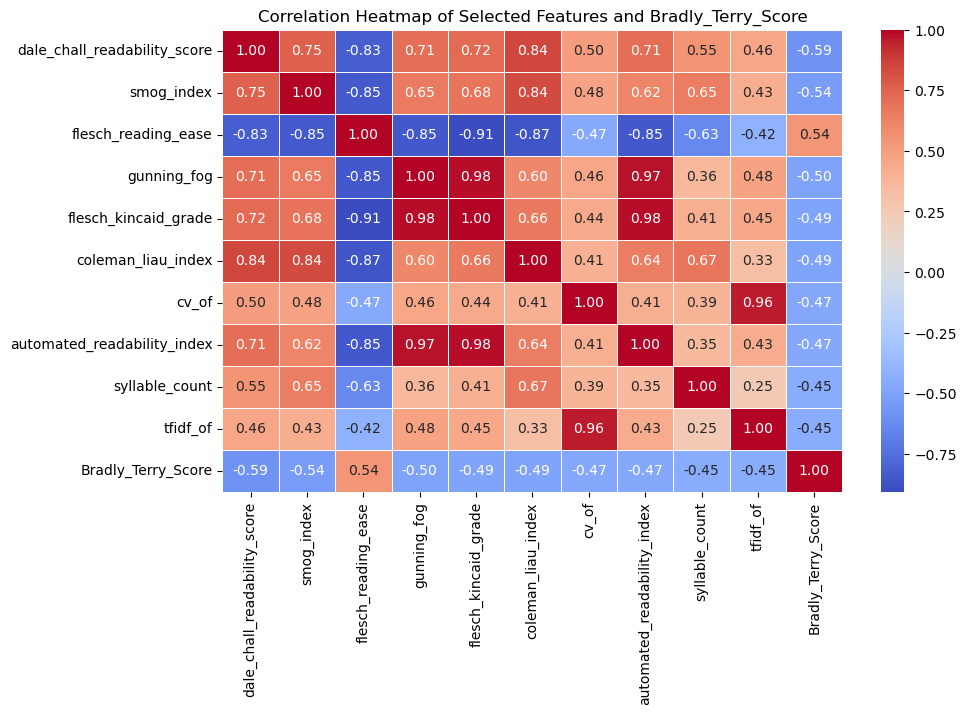

In [11]:
# Select top n features with highest absolute correlation
corr_top_features = correlations.abs().sort_values(ascending=False).head(10).index
print("Selected Top Features: ", corr_top_features)

# Create a new DF with the top features and the target
selected_data = full_df[corr_top_features.to_list() + ['Bradly_Terry_Score']]
corr_matrix = selected_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Selected Features and Bradly_Terry_Score")
plt.show()

#### Recursive Feature Elimination (RFE)

In [12]:
# Get the feature columns
X = full_df[correlations.index]
y = full_df['Bradly_Terry_Score']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply RFE with n features to select
model = LinearRegression()
rfe = RFE(model, n_features_to_select=100)
rfe = rfe.fit(X_scaled, y)

# Get the selected features
rfe_top_features = X.columns[rfe.support_]
print("RFE Selected Features: ", rfe_top_features)

RFE Selected Features:  Index(['flesch_kincaid_grade', 'gunning_fog', 'smog_index',
       'dale_chall_readability_score', 'coleman_liau_index',
       'linsear_write_formula', 'char_count', 'word_count', 'tfidf_acid',
       'tfidf_action', 'tfidf_an', 'tfidf_as', 'tfidf_back', 'tfidf_because',
       'tfidf_been', 'tfidf_certain', 'tfidf_children', 'tfidf_could',
       'tfidf_do', 'tfidf_food', 'tfidf_form', 'tfidf_get', 'tfidf_going',
       'tfidf_got', 'tfidf_has', 'tfidf_he', 'tfidf_help', 'tfidf_house',
       'tfidf_is', 'tfidf_its', 'tfidf_latter', 'tfidf_little', 'tfidf_lived',
       'tfidf_mamma', 'tfidf_may', 'tfidf_maybe', 'tfidf_of', 'tfidf_people',
       'tfidf_please', 'tfidf_possible', 'tfidf_ran', 'tfidf_said',
       'tfidf_school', 'tfidf_so', 'tfidf_soon', 'tfidf_started', 'tfidf_the',
       'tfidf_thought', 'tfidf_what', 'tfidf_which', 'tfidf_why', 'tfidf_you',
       'tfidf_your', 'cv_action', 'cv_an', 'cv_as', 'cv_back', 'cv_because',
       'cv_been', 'cv_c

* Create multiple linear regression models using Bradley_Terry_Score as the target variable, testing with three different test set sizes: 20%, 25%, and 30%. Cross-validate all models and summarize the test set metrics, including Mean Absolute Deviation (MAD), and R-squared (R²) in a table to identify the best model. Assess the suitability of developing a regression model for this problem, and provide your rationale based on the data and analysis results.

In [13]:
len(correlations.index)

241

In [14]:
len(rfe_top_features)

100

In [16]:
# Scaler of features
scaler = StandardScaler()

# Separate features and target
X = full_df[rfe_top_features]
y = full_df['Bradly_Terry_Score']

def evaluate_regression_model(test_size=.2):

    # Split data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Scale input features
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)

    # Initialize the model
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = linear_model.predict(X_test)

    # Evaluate model
    mad = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Cross validation using 5-fold cross-validation
    cv_mad = cross_val_score(linear_model, X_train, y_train, cv=5, scoring=make_scorer(mean_absolute_error)).mean()
    cv_r2 = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='r2').mean()

    return {"test_size": test_size,
            "r2_score": r2,
            "mad_score": mad,
            "r2_cv_score": cv_r2,
            "mad_cv_score": cv_mad}

# Evaluate model with different test set sizes
results = []
for test_size in [.2, .25, .3]:
    results.append(evaluate_regression_model(test_size))
results_df = pd.DataFrame(results)

# Display
results_df.head()

,test_size,r2_score,mad_score,r2_cv_score,mad_cv_score
0,0.20,0.467231,0.596934,0.488028,0.585399
1,0.25,0.464595,0.597424,0.489510,0.586277
2,0.30,0.482185,0.589670,0.481195,0.589722


The best regression model was the one using a test size of .3 with R-Squared of .4821.

### Problem 2. 
You use the data from problem 1 with numerical columns for this problem.
* Create a new column called "difficulty_level" that has 6 classes: very_hard, hard, challenging, moderate, easy, very_easy using the Bradly_Terry_Score scores. Note that negative scores mean harder to read, and positive scores mean easier to read. Use the boundary points as <-2.05, <-1.45, <-0.95, <-0.5, <0.08, and >= 0.08. Then use the feature selection method(s) for a classification model to select features to classify  difficulty_level.
* Now create classification model(s) (of your choice) with difficulty_level as a target variable. Use three different test set sizes 20%, 25%, and 30%. Make sure to cross-validate your models. Summarize the classification accuracy score using a table and pick your best model.
* Make a test set precision, recall, and F1 score table for your best model in part 2. Note that we have a multiclass classification problem. Use your best model to determine which of the 6 classes the following text excerpt should belong to?


In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, r2_score, make_scorer, f1_score, recall_score

#### Create `difficulty_level` column

In [20]:
# Create another data for the classification problem
class_df = full_df.copy()

# Label encoder
label_encoder = LabelEncoder()

# define bins and corresponding labels for dificculty
bins = [-np.inf, -2.05, -1.45, -0.95, -0.5, 0.08, np.inf]
labels = ["very_hard", "hard", "challenging", "moderate", "easy", "very_easy"]

# apply the above to the taget column
class_df['difficulty_level'] = pd.cut(class_df['Bradly_Terry_Score'], bins=bins, labels=labels)
class_df['difficulty_level_label'] = label_encoder.fit_transform(class_df['difficulty_level'])

#### Feature selection to classification model

In [21]:
# Separating input and target features
X = class_df[correlations.index]
y = class_df['difficulty_level_label']

# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

# Train RFE
logit_model = LogisticRegression()
rfe = RFE(model, n_features_to_select=100)
rfe.fit(X_train, y_train)

# Perform RFE to select the top n features
logit_top_features = X_train.columns[rfe.support_]
print("Selected Features: ", logit_top_features)

Selected Features:  Index(['tfidf_about', 'tfidf_account', 'tfidf_acid', 'tfidf_an', 'tfidf_any',
       'tfidf_around', 'tfidf_as', 'tfidf_asked', 'tfidf_away', 'tfidf_baby',
       'tfidf_back', 'tfidf_be', 'tfidf_because', 'tfidf_been', 'tfidf_being',
       'tfidf_big', 'tfidf_boy', 'tfidf_by', 'tfidf_came', 'tfidf_certain',
       'tfidf_could', 'tfidf_day', 'tfidf_did', 'tfidf_do', 'tfidf_don',
       'tfidf_down', 'tfidf_eat', 'tfidf_food', 'tfidf_form', 'tfidf_get',
       'tfidf_go', 'tfidf_got', 'tfidf_has', 'tfidf_help', 'tfidf_home',
       'tfidf_house', 'tfidf_how', 'tfidf_hungry', 'tfidf_in', 'tfidf_is',
       'tfidf_its', 'tfidf_just', 'tfidf_lived', 'tfidf_mamma', 'tfidf_may',
       'tfidf_maybe', 'tfidf_morning', 'tfidf_mother', 'tfidf_obtained',
       'tfidf_of', 'tfidf_per', 'tfidf_please', 'tfidf_possible',
       'tfidf_power', 'tfidf_pretty', 'tfidf_provided', 'tfidf_put',
       'tfidf_quantity', 'tfidf_ran', 'tfidf_said', 'tfidf_saw',
       'tfidf_sister', 

* Now create classification model(s) (of your choice) with difficulty_level as a target variable. Use three different test set sizes 20%, 25%, and 30%. Make sure to cross-validate your models. Summarize the classification accuracy score using a table and pick your best model.

In [22]:
# Scale the features
scaler = StandardScaler()

# Separate features and target
X = class_df[rfe_top_features]
y = class_df['difficulty_level_label']


# Evaluate model with different test set sizes
results = []
for test_size in [.2, .25, .3]:
    # Split data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Scale input features
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)

    # Initialize the model
    logit_model = LogisticRegression()
    logit_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = logit_model.predict(X_test)

    # Evaluate model
    lg_f1_score = f1_score(y_test, y_pred, average='weighted')
    lg_recall_score = recall_score(y_test, y_pred, average='weighted')

    # Cross validation using 5-fold cross-validation
    lg_f1_cv_score = cross_val_score(logit_model, X_train, y_train, cv=5, scoring='f1_weighted').mean()
    lg_recall_cv_score = cross_val_score(logit_model, X_train, y_train, cv=5, scoring='recall_weighted').mean()

    results.append({"test_size": test_size,
            "lg_f1_score": lg_f1_score,
            "lg_recall_score": lg_recall_score,
            "lg_f1_cv_score": lg_f1_cv_score,
            "lg_recall_cv_score": lg_recall_cv_score})

# Transform results into DF
results_df = pd.DataFrame(results)

# Display
results_df.head()

,test_size,lg_f1_score,lg_recall_score,lg_f1_cv_score,lg_recall_cv_score
0,0.20,0.299934,0.305115,0.355715,0.361265
1,0.25,0.304851,0.311707,0.351528,0.357176
2,0.30,0.338737,0.343126,0.333274,0.338876


The best classifcation model was the one using a test size of .3 with F1-Score of .3387.

Use your best model to determine which of the 6 classes the following text excerpt should belong to?

In [23]:
new_excerpt = """Business analytics leverages advanced statistical modeling, predictive algorithms, and optimization techniques 
to derive actionable insights from organizational data. Data is sourced from systems like ERP and CRM, then processed 
through data pipelines for cleansing, normalization, and feature engineering. Analysts apply methods such as principal 
component analysis (PCA) and k-means clustering for dimensionality reduction and segmentation, respectively. 
Predictive models, including logistic regression, gradient boosting machines (GBM), and neural networks, 
are deployed for forecasting and classification tasks. Complex optimization techniques, such as mixed-integer linear 
programming (MILP), enhance resource allocation and operational planning. Tools like Python, R, and SQL, 
integrated with BI platforms like Tableau, support dynamic visualizations and scenario analysis, 
driving strategic decision-making.
"""

new_data = pd.DataFrame({"text": [new_excerpt]})
new_data.head()

,text
0,Business analytics leverages advanced statisti...


##### Prepering the inferance data

In [24]:
# Apply transformations
new_data['tokens'] = new_data['text'].apply(lambda x: [word.lower() for word in word_tokenize(x)])
new_data['tokens'] = new_data['tokens'].apply(lambda x: [item for item in x if item not in stops])
new_data['subjectivity'] = new_data.apply(lambda x: TextBlob(x['text']).sentiment.subjectivity, axis=1)
new_data['polarity'] = new_data.apply(lambda x: TextBlob(x['text']).sentiment.polarity, axis=1)
new_data['sia_polarity'] = new_data['text'].apply(lambda x: sia.polarity_scores(x)['compound'])
new_data['sia_neutrality'] = new_data['text'].apply(lambda x: sia.polarity_scores(x)['neu'])
new_data['flesch_reading_ease'] = new_data['text'].apply(lambda x: textstat.flesch_reading_ease(x))
new_data['flesch_kincaid_grade'] = new_data['text'].apply(lambda x: textstat.flesch_kincaid_grade(x))
new_data['gunning_fog'] = new_data['text'].apply(lambda x: textstat.gunning_fog(x))
new_data['smog_index'] = new_data['text'].apply(lambda x: textstat.smog_index(x))
new_data['automated_readability_index'] = new_data['text'].apply(lambda x: textstat.automated_readability_index(x))
new_data['dale_chall_readability_score'] = new_data['text'].apply(lambda x: textstat.dale_chall_readability_score(x))
new_data['coleman_liau_index'] = new_data['text'].apply(lambda x: textstat.coleman_liau_index(x))
new_data['linsear_write_formula'] = new_data['text'].apply(lambda x: textstat.linsear_write_formula(x))
new_data['syllable_count'] = new_data['text'].apply(lambda x: textstat.syllable_count(x))
new_data['char_count'] = new_data['text'].apply(lambda x: textstat.char_count(x))
new_data['word_count'] = new_data['text'].apply(lambda x: textstat.lexicon_count(x))

# tfidf_vectorizer
tfidf_matrix = tfidf_vectorizer.transform(new_data['text'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df.columns = ['tfidf_' + col for col in tfidf_df.columns]
new_data = pd.concat([new_data, tfidf_df], axis=1)

# CountVectorizer
X = count_vectorizer.transform(new_data['text'])
feature_names = count_vectorizer.get_feature_names_out()
features_df = pd.DataFrame(X.toarray(), columns=feature_names)
features_df.columns = ['cv_' + col for col in features_df.columns]
new_data = pd.concat([new_data, features_df], axis=1)

# Select pre-existing columns only
inference_df = new_data[features.columns]

# Display
rows, columns = inference_df.shape
print(f"The dataset contains {rows:,} rows and {columns} columns")
inference_df.head()

The dataset contains 1 rows and 53681 columns


,subjectivity,polarity,sia_polarity,sia_neutrality,flesch_reading_ease,flesch_kincaid_grade,gunning_fog,smog_index,automated_readability_index,dale_chall_readability_score,...,cv_µv,cv_½d,cv_ædui,cv_ægidus,cv_æmilius,cv_æneas,cv_æolian,cv_æquians,cv_æschylus,cv_ça
0,0.377778,0.016667,0.9674,0.803,1.94,17.6,19.29,17.1,22.0,15.51,...,0,0,0,0,0,0,0,0,0,0


#### Make prediciton

In [32]:
# Make predictions
inference_df = inference_df[rfe_top_features]
inference_df = scaler.transform(inference_df)
inference_df = pd.DataFrame(inference_df, columns=rfe_top_features)
inference_df['difficulty_level_label_pred'] = logit_model.predict(inference_df)

print(f"According to my clasification model, the new excerpt belongs to class {inference_df.iloc[0,-1]}.")

According to my clasification model, the new excerpt belongs to class 4.


### Problem 3.  
Do the following.
* Let's define a term: lexical_diversity = (number of words in the text)/ (number of unique words in the text). Find and print the most diverse and least diverse text using the definition above. What is the range of the lexical diversity score?
* Find two lists of texts: the top 10 most similar and the top 10 most dissimilar excerpts in the original text data compared to the new excerpt using the cosine similarity metric. Then, repeat this process using the Jaccard Similarity coefficient as outlined on page 232 of the Web Data Mining book.(https://www.cs.uic.edu/~liub/WebMiningBook.html)
* Use the process explained in  6.7.3 An Example Example 12 of Web Data Mining Book pages 246-248 to find out the document matrix A and use the SVD  to write A as a product of $U$, $\Sigma$, and $V^T$ for the 6 text documents below with the given keyword list. 

In [97]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import jaccard_score
from sklearn.decomposition import TruncatedSVD

In [22]:
# Import dataset
data_loc = "/Users/gabrielvictorgomesferreira/Library/Mobile Documents/com~apple~CloudDocs/Work/ISU Classes/Data/"
file_name = "textdata.csv"
text_df = pd.read_csv(data_loc + file_name)
text_df['tokens'] = text_df['text'].apply(lambda x: [word.lower() for word in word_tokenize(x)])
text_df['tokens'] = text_df['tokens'].apply(lambda x: [item for item in x if item not in stops])

# Display
rows, columns = text_df.shape
print(f"The dataset contains {rows:,} rows and {columns} columns")
text_df.head(5)

The dataset contains 2,834 rows and 4 columns


,textid,text,Bradly_Terry_Score,tokens
0,c12129c31,When the young people returned to the ballroom...,-0.340259,"[young, people, returned, ballroom, ,, present..."
1,85aa80a4c,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,"[dinner, time, ,, mrs., fayre, somewhat, silen..."
2,b69ac6792,"As Roger had predicted, the snow departed as q...",-0.580118,"[roger, predicted, ,, snow, departed, quickly,..."
3,dd1000b26,And outside before the palace a great garden w...,-1.054013,"[outside, palace, great, garden, walled, round..."
4,37c1b32fb,Once upon a time there were Three Bears who li...,0.247197,"[upon, time, three, bears, lived, together, ho..."


* Let's define a term: lexical_diversity = (number of words in the text)/ (number of unique words in the text). Find and print the most diverse and least diverse text using the definition above. What is the range of the lexical diversity score?

In [99]:
# Define a function to calculate lexical diversity
def lexical_diversity(text):
    num_words = len(text)  
    unique_words = len(set(text))  
    if unique_words == 0: 
        return 0
    return num_words / unique_words

# Apply the function
text_df['lexical_diversity'] = text_df['tokens'].apply(lexical_diversity)

text_df.head()

,textid,text,Bradly_Terry_Score,tokens,lexical_diversity
0,c12129c31,When the young people returned to the ballroom...,-0.340259,"[young, people, returned, ballroom, ,, present...",1.486486
1,85aa80a4c,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,"[dinner, time, ,, mrs., fayre, somewhat, silen...",1.756410
2,b69ac6792,"As Roger had predicted, the snow departed as q...",-0.580118,"[roger, predicted, ,, snow, departed, quickly,...",1.594937
3,dd1000b26,And outside before the palace a great garden w...,-1.054013,"[outside, palace, great, garden, walled, round...",1.445783
4,37c1b32fb,Once upon a time there were Three Bears who li...,0.247197,"[upon, time, three, bears, lived, together, ho...",3.769231


In [100]:
# Find the most and least diverse texts
most_diverse = text_df.loc[text_df['lexical_diversity'].idxmax()]
least_diverse = text_df.loc[text_df['lexical_diversity'].idxmin()]

# Calculate the range of scores
lexical_diversity_range = text_df['lexical_diversity'].max() - text_df['lexical_diversity'].min()

#### Display Results

In [105]:
print(f"Range of Lexical Diversity Scores: {lexical_diversity_range}")

Range of Lexical Diversity Scores: 3.7790096082779012


##### Most Diverse Text

In [103]:
print("Most Diverse Text:")
print(f"Lexical Diversity Score: {most_diverse['lexical_diversity']}")
print(most_diverse['text'])

Most Diverse Text:
Lexical Diversity Score: 4.909090909090909
Dog is in his house. Dog is sitting in his house. Then someone knocks on the door. Dog opens the door. Dog sees someone yellow! Dog asks, "Who are you?" It is Cat. Cat is yellow. Cat's head is yellow. Cat's hair is yellow. Cat's arms are yellow. Cat's hands are yellow. Cat's mouth is yellow. Cat's nose is yellow. Cat's ears are yellow. Cat's eyes are yellow. Dog asks, "Why are you yellow?" Cat says, "I do not know." Dog asks, "Where were you?" Cat says, "I was at the school." Dog asks, "Which school?" Cat says, "I was at the school in the village." Dog asks, "When were you at school?" Cat says, "I was at school this morning." Dog asks, "What were you doing at school?" Cat says, "I was sleeping." Dog asks, "You were sleeping at school?! Where were you sleeping?" Cat says, "I was sleeping behind the school."


##### Least Diverse Text

In [104]:
print("Least Diverse Text:")
print(f"Lexical Diversity Score: {least_diverse['lexical_diversity']}\n")
print(least_diverse['text'])

Least Diverse Text:
Lexical Diversity Score: 1.1300813008130082

Theodore Roosevelt, Jr. was the paramount trailblazer who gave the Progressive Era its name.
Famous for his strenuous lifestyle, swashbuckling and exuberant personality, our 26th president was a statesman honored by the Nobel Peace Prize for negotiating a treaty that ended the Russo-Japanese War; an author of 18 books (including a four volume history entitled The Winning of the West), a warrior who in the Spanish-American War led the legendary charge of the Rough Riders up the San Juan hill in Cuba; and a learned naturalist who explored remote regions of South America and Africa.
But Roosevelt's biggest claim to lasting fame was his bold leadership as the youngest President of the United States.
Deeply socially-conscious and furious at the greed and deceitful practices of big business leaders, Roosevelt fired his first barrage at what were then called "the robber barons" shortly after his inauguration in 1901. He delivere

* Find two lists of texts: the top 10 most similar and the top 10 most dissimilar excerpts in the original text data compared to the new excerpt using the cosine similarity metric. Then, repeat this process using the Jaccard Similarity coefficient as outlined on page 232 of the Web Data Mining book.(https://www.cs.uic.edu/~liub/WebMiningBook.html)

### Cosine Similarity

In [94]:
# Combine original texts with the new_excerpt for vectorization
original_texts = text_df['text']
texts_combined = original_texts + [new_excerpt]

# Vectorize all texts
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(texts_combined)

# Compute cosine similarity between the new_excerpt and all other texts
cosine_similarities = cosine_similarity(tfidf_matrix[-1:], tfidf_matrix[:-1]).flatten()

# Get the indexes of the top 10 most similar and dissimilar texts
most_similar_indices = cosine_similarities.argsort()[-10:][::-1]  # Top 10 most similar
most_dissimilar_indices = cosine_similarities.argsort()[:10]      # Top 10 least similar

# Get the top 10 most and least similar texts
most_similar_texts = [original_texts[i] for i in most_similar_indices]
most_dissimilar_texts = [original_texts[i] for i in most_dissimilar_indices]

#### Display Results

#### Top 10 Most Similar Cosine Similarity Texts

In [95]:
i=1
print("Top 10 Most Similar Cosine Similarity Texts:")
for text in most_similar_texts:
    print(f"{i}: {text} \n")
    i+=1

Top 10 Most Similar Cosine Similarity Texts:
1: Each species has their different habits: a monkey jumps from branch to branch until it finds some fruit to eat, a bat flies around in the dark of the night between trees, a whale swims in the wide-open ocean. Since the brains of these animals help them to do all these tasks, we would guess that their brains would be very different. But it turns out that the main parts of the brain and the connections within the brain are all pretty much the same for all mammals. This similarity in brain structure exists because of the evolutionary history that all these brains share.
In fact, if we put brains of different mammals next to each other, the similarities are easy to spot. Even though the brains vary (a lot) in their size and in their folds, they all have the same parts. All these brains have a cerebral cortex, a cerebellum, and a brain stem. Also, the same kinds of cells make up all brains: they are made of neurons, glial cells, and the cells 

#### Top 10 Most Dissimilar Cosine Similarity Texts

In [96]:
i=1
print("Top 10 Most Dissimilar Cosine Similarity Texts:")
for text in most_dissimilar_texts:
    print(f"{i}: {text} \n")
    i+=1

Top 10 Most Dissimilar Cosine Similarity Texts:
1: Bon is on a summer break! He asks Ma to play. But she is busy. She tells Bon to ask his Pa. Bon finds his Pa. "Pa! Want to play ball?" Pa says no. He is going to work. But Pa has an idea. He gives Bon a bag of balloons. Then Pa goes out the door. Bon finds his sister. Su is busy cutting paper for a class party. She gives Bon some paper. She tells him to make airplanes! Bon is very upset. Everyone is too busy to play with him! So, Bon goes into the garden. He will play with Butter the parrot. Butter looks at Bon. Bon looks at Butter. Bon has an idea. He has balloons. He has paper. Bon gets to work. He cuts and pastes. He pastes and cuts. Bon works for days! Finally, it's Saturday. Everybody is home. Bon invites his family to a party. They are surprised. It is not Bon's birthday. So, whose party is it? Bon just smiles. He asks his family to follow him. Bon jumps up and down. He laughs. He tells his family that it is Butter's birthday! 



### Jaccard Similarity

In [91]:
# Tokenize the texts and the new excerpt
def jaccard_similarity(text1, text2):
    set1 = set(text1.split())
    set2 = set(text2.split())
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    if len(union) == 0:
        return 0
    return len(intersection) / len(union)

# Compute Jaccard similarity between the new excerpt and all original texts
jaccard_similarities = [jaccard_similarity(new_excerpt, text) for text in original_texts]

# Get the indexes of the top 10 most similar and dissimilar texts
most_similar_indices_jaccard = np.argsort(jaccard_similarities)[-10:][::-1]  # Top 10 most similar
most_dissimilar_indices_jaccard = np.argsort(jaccard_similarities)[:10]      # Top 10 least similar

# Get the top 10 most and least similar texts based on Jaccard similarity
most_similar_texts_jaccard = [original_texts[i] for i in most_similar_indices_jaccard]
most_dissimilar_texts_jaccard = [original_texts[i] for i in most_dissimilar_indices_jaccard]

#### Display Results

##### Top 10 Most Similar Jaccard Similarity Texts

In [92]:
# Display results
i=1
print("Top 10 Most Similar Jaccard Similarity Texts:")
for text in most_similar_texts_jaccard:
    print(f"{i}: {text} \n")
    i+=1

print("")

Top 10 Most Similar Jaccard Similarity Texts:
1: Big data is a term for data sets that are so large or complex that traditional data processing applications are inadequate. Challenges include analysis, capture, data curation, search, sharing, storage, transfer, visualization, querying, updating and information privacy. The term often refers simply to the use of predictive analytics, user behavior analytics, or certain other advanced data analytics methods that extract value from data, and seldom to a particular size of data set. Accuracy in big data may lead to more confident decision making, and better decisions can result in greater operational efficiency, cost reduction and reduced risk.
Analysis of data sets can find new correlations to "spot business trends, prevent diseases, combat crime and so on." Scientists, business executives, practitioners of medicine, advertising and governments alike regularly meet difficulties with large data sets in areas including Internet search, fina

#### Top 10 Most Dissimilar Jaccard Similarity Texts

In [93]:
i=1
print("Top 10 Most Dissimilar Jaccard Similarity Texts:")
for text in most_dissimilar_texts_jaccard:
    print(f"{i}: {text} \n")
    i+=1

Top 10 Most Dissimilar Jaccard Similarity Texts:
1: For Dog it is too cold. Cat gives Dog underwear. One pair of underwear is dirty. One pair of underwear is clean. Dog takes the clean underwear. But it is still too cold. Cat gives Dog shirts. One shirt is big. One shirt is small. Dog takes the big shirt. But it is still too cold. Cat gives Dog trousers. One pair of trousers is long. One pair of trousers is short. Dog takes the long pair of trousers. But it is still too cold. Cat gives Dog vests. One vest is wet, one vest is dry. Dog takes the dry vest, but it is still too cold. Cat gives Dog jackets. One jacket is thick, one jacket is thin. Dog takes the thick jacket, but it is still too cold. Cat gives Dog hats. One hat is high, one hat is low. Dog takes the high hat, but it is still too cold. Cat gives Dog shoes. One pair of shoes is new, one pair of shoes is old. 

2: Daddy Blake had to go away early the next morning, to be gone three days, so he did not have time to tell Hal and M

* Use the process explained in  6.7.3 An Example Example 12 of Web Data Mining Book pages 246-248 to find out the document matrix A and use the SVD  to write A as a product of $U$, $\Sigma$, and $V^T$ for the 6 text documents below with the given keyword list. 

In [79]:
# Quotes
Henry_Ford = "Whether you think you can, or you think you can’t—you’re right."
Andrew_Carnegie = "The first one gets the oyster, the second gets the shell."
Warren_Buffett = "Someone’s sitting in the shade today because someone planted a tree a long time ago."
Mary_Kay_Ash = "Pretend that every single person you meet has a sign around their neck that says, 'Make me feel important.' Not only will you succeed in sales, you will succeed in life."
Richard_Branson = "Business opportunities are like buses, there’s always another one coming."
Jack_Welch = "Change before you have to."

# Keywords
keywords = [
    'Opportunity', 'Success', 'Vision', 'Innovation', 'Leadership', 'Strategy', 
    'Growth', 'Change', 'Ambition', 'Determination', 'Value', 'Persistence', 
    'Leadership', 'Sales', 'Transformation'
]

In [88]:
# Combine documents with names
documents = {
    'Henry_Ford': Henry_Ford.lower(),
    'Andrew_Carnegie': Andrew_Carnegie.lower(),
    'Warren_Buffett': Warren_Buffett.lower(),
    'Mary_Kay_Ash': Mary_Kay_Ash.lower(),
    'Richard_Branson': Richard_Branson.lower(),
    'Jack_Welch': Jack_Welch.lower()
}

# Lowering keywords
keywords = [word.lower() for word in keywords]



# Initialize TruncatedSVD 
n_components = 2  
svd_model = TruncatedSVD(n_components=n_components, random_state=42)

# Fit and transform the term-document matrix
W_svd_matrix = svd_model.fit_transform(A)  # Document-to-concept matrix (like U)
H_svd_matrix = svd_model.components_  # Concept-to-term matrix (like VT)

# Save matrices as DFs
W_svd_df = pd.DataFrame(W_svd_matrix, index=documents.keys(), columns=[f"Concept_{i+1}" for i in range(n_components)])
H_svd_df = pd.DataFrame(H_svd_matrix, index=[f"Concept_{i+1}" for i in range(n_components)], columns=terms)


#### Display Results

In [89]:
W_svd_df

,Concept_1,Concept_2
Henry_Ford,0.000000,0.000000
Andrew_Carnegie,0.000000,0.000000
Warren_Buffett,0.000000,0.000000
Mary_Kay_Ash,-0.399574,0.916701
Richard_Branson,0.000000,0.000000
Jack_Welch,0.916701,0.399574


The aboxe matrix shows how each document relates to the two latent concepts.
- Jack_Welch quote is associated with **Concept 1**, which is related to `change`.
- Mary_Kay_Ash quote is associated with **Concept 2**, which is related to `sales`.

The other quotes have no associations with these concepts due to sparse keyword matches.


In [90]:
H_svd_df

,ambition,change,determination,growth,innovation,leadership,opportunity,persistence,sales,strategy,success,transformation,value,vision
Concept_1,-0.0,0.916701,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.399574,-0.0,-0.0,-0.0,-0.0,-0.0
Concept_2,-0.0,0.399574,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.916701,-0.0,-0.0,-0.0,-0.0,-0.0


The above matrix shows the keywords most associated with each concept.

- Concept_1 is dominated by `change` and `sales`, with `change` being the most significant keyword.
- Concept_2 is also associated with both, but it is the opposite in terms of significance.

Other keywords have no significant contributions to these concepts.


### Problem 4.  (Refer to Chapter 7 of Web Data Mining Book for this problem.)
Upload and read the social network connections dataset containing two columns (id_1 and id_2), representing the connections between individuals. 
* Calculate the total number of connections for each ID by aggregating the values from both columns, treating each as a connection count for an individual. Identify the top 10 IDs with the most connections, and print them in descending order to highlight the central actors in the network.
* Remove all IDs that have 300 or fewer connections from both columns (id_1 and id_2) to focus on the more central actors within the network. Display the shape of the filtered dataset to verify the reduced size and check the value counts of id_1 to understand the distribution of connections after filtering. Verify that all remaining IDs have more than 300 connections.
* Create a network graph for the ID with the most connections, adding labels, titles, and highlighting the central node to show its importance. Then, compute the betweenness centrality for the network, which indicates how nodes bridge others. Find the top 10 IDs with the highest centrality scores and display them in a bar chart with clear labels and titles to illustrate their significance.  
Helpful link.
https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.betweenness_centrality.html

In [25]:
!pip install networkx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.4 MB/s eta 0:00:00


In [6]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import networkx as nx

In [2]:
data_loc = "/Users/gabrielvictorgomesferreira/Library/Mobile Documents/com~apple~CloudDocs/Work/ISU Classes/Data/"
file_name = "sn_ids.csv"

sn_df = pd.read_csv(data_loc + file_name)
rows, columns = sn_df.shape
print(f"The dataset contains {rows:,} rows and {columns} columns")
sn_df.head()

The dataset contains 289,003 rows and 2 columns


,id_1,id_2
0,0,23977
1,1,34526
2,1,2370
3,1,14683
4,1,29982


* Calculate the total number of connections for each ID by aggregating the values from both columns, treating each as a connection count for an individual. Identify the top 10 IDs with the most connections, and print them in descending order to highlight the central actors in the network.

In [3]:
# Concatenate both columns into one single column
all_ids = pd.concat([sn_df['id_1'], sn_df['id_2']], axis=0)

# Count the total number of connections for each ID
connection_counts = all_ids.value_counts().sort_values(ascending=False)

# Identify the top 10 IDs with the most connections
top_10_ids = connection_counts.head(10)

print("Top 10 IDs with the most connections:")
print(top_10_ids)

Top 10 IDs with the most connections:
31890    9458
27803    7085
35773    3324
19222    2958
13638    2468
36652    2343
18163    1924
9051     1797
35008    1571
10001    1568
Name: count, dtype: int64


* Remove all IDs that have 300 or fewer connections from both columns (id_1 and id_2) to focus on the more central actors within the network. Display the shape of the filtered dataset to verify the reduced size and check the value counts of id_1 to understand the distribution of connections after filtering. Verify that all remaining IDs have more than 300 connections.

##### Remove all IDs that have 300 or fewer connections from both columns (id_1 `**and**` id_2)

In [38]:
# Get IDs with more than 300 connections
ids_300_plus = connection_counts[connection_counts > 300].index
print("Number of Unique IDs: ", len(ids_300_plus))

# Remove all IDs that have 300 or fewer connections from both columns (id_1 **and** id_2)
selected_df_and = sn_df[(sn_df['id_1'].isin(ids_300_plus)) & (sn_df['id_2'].isin(ids_300_plus))]
print(selected_df_and.shape)
selected_df_and.head()

Number of Unique IDs:  125
(1691, 2)


,id_1,id_2
5265,494,35773
5269,494,1164
5307,494,35388
5348,494,27803
5349,494,23664


##### Check the value counts of id_1 to understand the distribution of connections after filtering.

id_1
27803    117
2281      59
19222     53
18562     51
10001     45
        ... 
26110      2
29023      2
35523      1
35876      1
36819      1
Name: count, Length: 119, dtype: int64


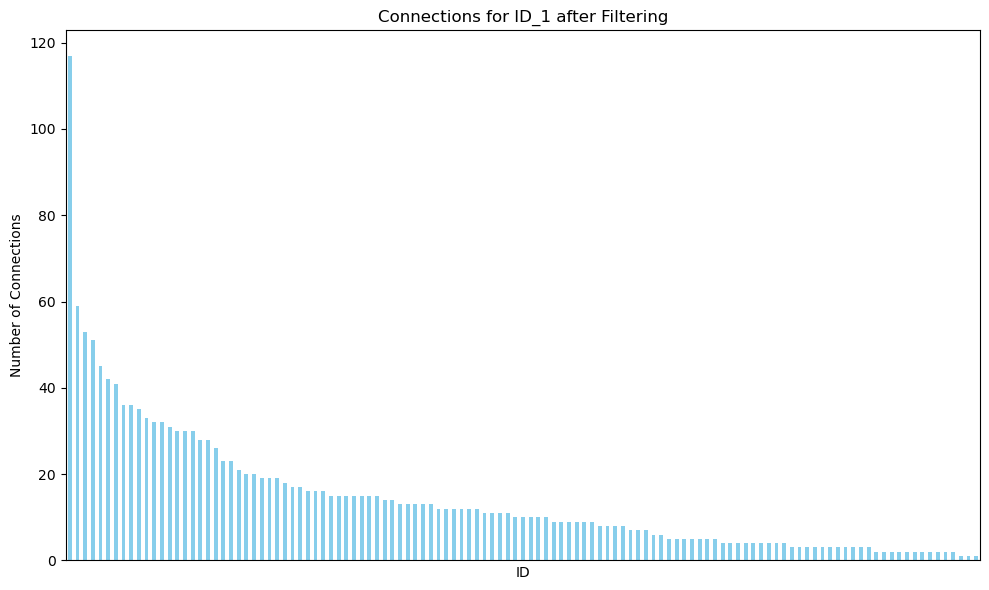

In [52]:
# Get the value counts of id_1
id_1_counts = selected_df_and['id_1'].value_counts()
print(id_1_counts)

# Plot the value counts
plt.figure(figsize=(10,6))
id_1_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('ID')
plt.ylabel('Number of Connections')
plt.title('Connections for ID_1 after Filtering')
plt.xticks(rotation=90)
plt.xticks([], [])  # This removes the x-axis labels
plt.tight_layout()
plt.show()

##### Verify that all remaining IDs have more than 300 connections.

In [40]:
# Concatenate both columns into one single column
all_ids_filtered = pd.concat([selected_df_and['id_1'], selected_df_and['id_2']], axis=0)

# Count the total number of connections for each ID
connection_counts_filtered = all_ids_filtered.value_counts()

# Verify if these indexes are all in the ids_300_plus indexes list
isin_result = pd.Series(connection_counts_filtered.index.isin(ids_300_plus))

# Check outcome
isin_result.value_counts()


True    125
Name: count, dtype: int64

They all had more than 300 connections before the filtering.

* Create a network graph for the ID with the most connections, adding labels, titles, and highlighting the central node to show its importance. Then, compute the betweenness centrality for the network, which indicates how nodes bridge others. Find the top 10 IDs with the highest centrality scores and display them in a bar chart with clear labels and titles to illustrate their significance.  
Helpful link.
https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.betweenness_centrality.html

Create a network graph for the ID with the most connections, adding labels, titles, and highlighting the central node to show its importance. 

In [54]:
top_10_ids

31890    9458
27803    7085
35773    3324
19222    2958
13638    2468
36652    2343
18163    1924
9051     1797
35008    1571
10001    1568
Name: count, dtype: int64

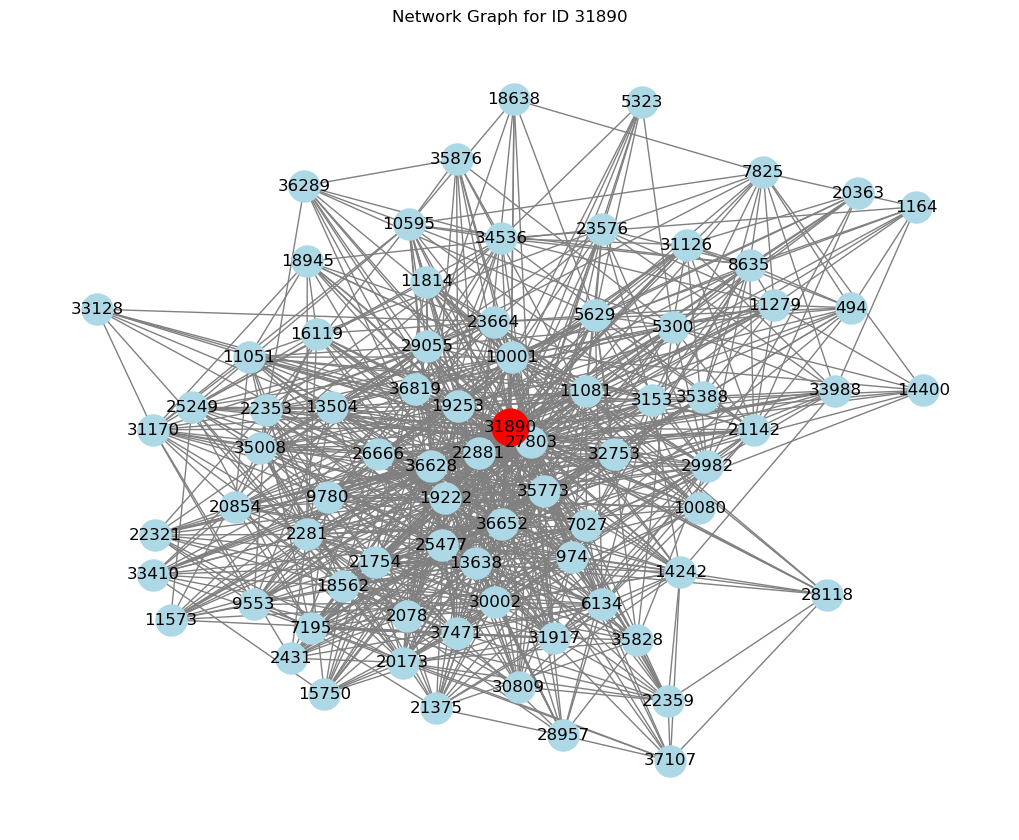

In [51]:
# ID with the most connections
top_ID = top_10_ids.index[0]

# Create a graph from the selected DF
G = nx.from_pandas_edgelist(selected_df_and, 'id_1', 'id_2')

# Get the neighbors of the top ID
neighbors = list(G.neighbors(top_ID))

# Create a subgraph including the top ID and its neighbors
subgraph_nodes = neighbors + [top_ID]
SubG = G.subgraph(subgraph_nodes)

# Draw the subgraph
pos = nx.spring_layout(SubG)
plt.figure(figsize=(10, 8))
nx.draw(SubG, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500)
nx.draw_networkx_nodes(SubG, pos, nodelist=[top_ID], node_color='red', node_size=700)
plt.title(f"Network Graph for ID {top_ID}")
plt.tight_layout()
plt.show()


Then, compute the betweenness centrality for the network, which indicates how nodes bridge others. 

In [43]:
# Compute betweenness centrality
centrality = nx.betweenness_centrality(G)
centrality_series = pd.Series(centrality)

# Find the top 10 IDs with the highest centrality scores
top_10_centrality = centrality_series.sort_values(ascending=False).head(10)
print("Top 10 IDs with the Highest Betweenness Centrality:")
print(top_10_centrality)

Top 10 IDs with the Highest Betweenness Centrality:
27803    0.174972
19222    0.055465
22881    0.048421
31890    0.046196
19253    0.039608
36628    0.039212
2281     0.025738
10001    0.023643
13638    0.022853
25477    0.022481
dtype: float64


Find the top 10 IDs with the highest centrality scores and display them in a bar chart with clear labels and titles to illustrate their significance.  

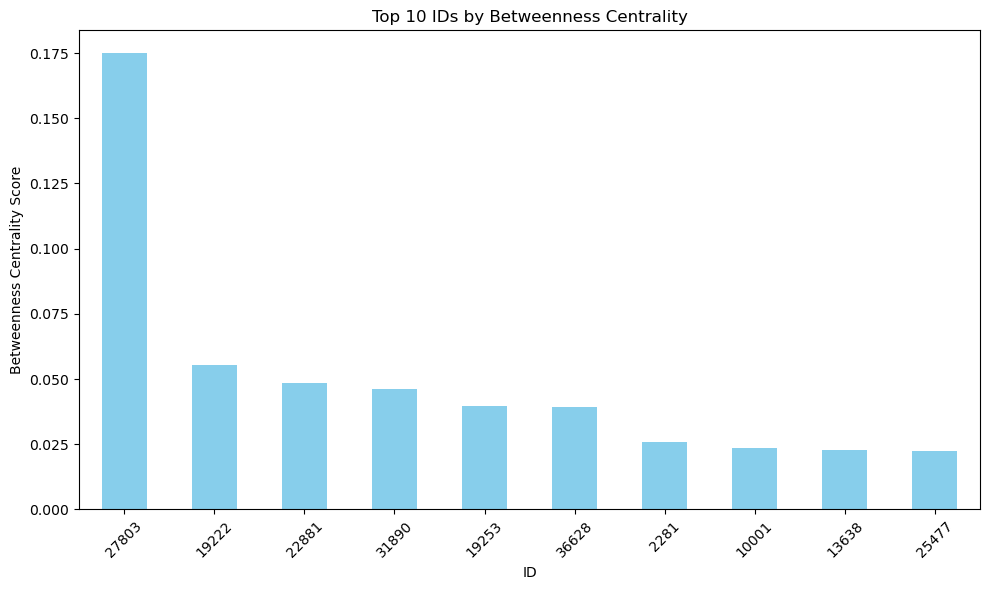

In [44]:
# Plot the top 10 IDs with the highest centrality scores
plt.figure(figsize=(10, 6))
top_10_centrality.plot(kind='bar', color='skyblue')
plt.title('Top 10 IDs by Betweenness Centrality')
plt.xlabel('ID')
plt.ylabel('Betweenness Centrality Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()